# Fitting and Evalutating

In [8]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
import pickle
import numpy as np

with open('tmp/model.pkl', 'rb') as fp:
    clf, X, y = pickle.load(fp)

# Binarize the label
y_b = preprocessing.label_binarize(y, classes=np.unique(y))
y_b = np.reshape(y_b, (len(y_b),))

# Train test split
train_X, test_X, train_y, test_y = train_test_split(X, y_b,
    test_size=0.2,
    random_state=41)

np.shape(train_X), test_X.shape, train_y.shape, test_y.shape

from sklearn.preprocessing import StandardScaler  # doctest: +SKIP
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(train_X)  # doctest: +SKIP
train_X_s = scaler.transform(train_X)  # doctest: +SKIP
# apply same transformation to test data
test_X_s = scaler.transform(test_X)  # doctest: +SKIP

## Fit

In [9]:
scores = {}
for k, v in clf.items():
    v.fit(train_X, train_y)
    scores[k] = v.score(test_X, test_y)
    print(k, scores[k])

lda 0.7358490566037735
lg 0.8301886792452831
rf 0.9371069182389937
adb 0.9308176100628931
mlp 0.4025157232704403


## Evaluate

In [14]:
# import matplotlib.pyplot as plt
# ROC curve
# def eval_roc(y_test, y_score):
#     """
#     Args:
#         y_test: 2-d np.array
#     """
#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     if y_test.ndim == 1:
#         l = 0
#     else:
#         l = y_test.shape[1]
#     for i in range(l):
#         fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])

#     # Compute micro-average ROC curve and ROC area
#     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#     return fpr, tpr, roc_auc

# def plot_roc(fpr, tpr, roc_auc, title='Receiver operating characteristic example'):
#     """ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html"""
#     plt.figure()
#     lw = 2
#     plt.plot(fpr, tpr, color='darkorange',
#              lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(title)
#     plt.legend(loc="lower right")
#     plt.show()

# for k in clf.keys():
#     if k == 'mlp':    
#         metrics.plot_roc_curve(clf[k], test_X_s, test_y)
#     else:
#         metrics.plot_roc_curve(clf[k], test_X, test_y)
#     plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

# roc_curve(test_y, clf['rf'].predict(test_X), pos_label=clf['rf'].classes_[1])
# metrics.plot_roc_curve(clf['rf'], test_X, test_y)
# plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

# roc_curve(test_y, clf.decisions(test_X), drop_intermediate=False)
# score_y = clf.predict(test_X)
# fpr, tpr, roc_auc = eval_roc(test_y, score_y)
# fpr, tpr, roc_auc

# plot_roc(fpr['micro'], tpr['micro'], roc_auc['micro'])

(array([0.        , 0.04477612, 1.        ]),
 array([0.        , 0.92391304, 1.        ]),
 array([2, 1, 0]))

In [27]:


model = clf['rf']
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train_X)
train_rf_probs = model.predict_proba(train_X)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test_X)
rf_probs = model.predict_proba(test_X)[:, 1]


base_fpr, base_tpr, model_fpr, model_tpr = evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs, train_y, test_y)


Recall 	 Base: 1.0 	 Test: 0.92	 Train: 1.0
Precis 	 Base: 0.58 	 Test: 0.97	 Train: 1.0
Roc 	 Base: 0.5 	 Test: 0.98	 Train: 1.0


Recall Baseline: 1.0 Test: 0.92 Train: 1.0
Precision Baseline: 0.58 Test: 0.97 Train: 1.0
Roc Baseline: 0.5 Test: 0.98 Train: 1.0


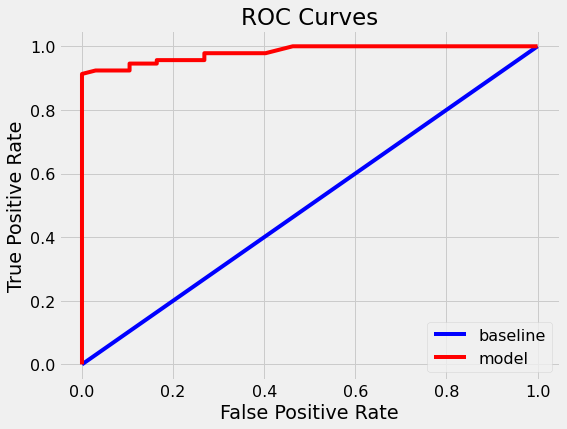

In [20]:
from plots import plot_roc_curve

    

# roc_curve(test_y, clf['rf'].predict(test_X), pos_label=clf['rf'].classes_[1])

Confusion matrix, without normalization
[[64  3]
 [ 7 85]]


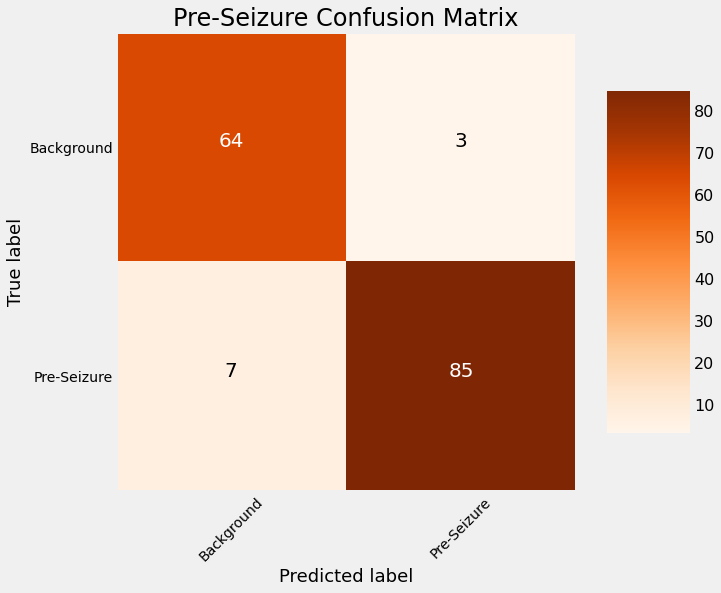

In [30]:
from plots import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(test_y, rf_predictions)
plot_confusion_matrix(cm, classes = ['Background', 'Pre-Seizure'],
                      title = 'Pre-Seizure Confusion Matrix')

In [ ]:
# presist trained model
import pickle
with open('model.pkl', 'wb') as fp:
    pickle.dump(clf, fp)
with open('model.pkl', 'rb') as fp:
    clf = pickle.load(fp)
# clf.predict(test_X[0, :]), test_y[0]